In [ ]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
from typing import List, Union
from tqdm import tqdm
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=1.2)

PROJECT_ROOT_DIR = Path().absolute().parent
str(PROJECT_ROOT_DIR)
sys.path.append(str(PROJECT_ROOT_DIR.absolute()))

print(PROJECT_ROOT_DIR)

from flycraft.utils_common.geometry_utils import v_mu_chi_2_enh

/home/ucav/PythonProjects


In [12]:
demos_easy_file = PROJECT_ROOT_DIR / "runF16" / "algorithm" / "rollout" / "cache" / "test_on_all_goals" / "res_for_checking_precision_iter_4_256_256_128_128_64_rl_bc_1.csv"
demos_easy_df = pd.read_csv(demos_easy_file)
demos_easy_df = demos_easy_df.sort_values(by="error_value", ascending=True)
demos_easy_df.insert(11, "achieved by", ["$\mathcal{D} 10$"] * len(demos_easy_df))
demos_chi_10_df = demos_easy_df[(demos_easy_df["chi"]==10.0) & (demos_easy_df["termination"]=="reach target")]
DEMOS_10_NUM = len(demos_chi_10_df)
DEMOS_10_NUM

489

In [13]:
demos_medium_file = PROJECT_ROOT_DIR / "runF16" / "algorithm" / "rollout" / "cache" / "test_on_all_goals" / "res_for_checking_precision_iter_4_256_256_128_128_64_rl_bc_1.csv"
demos_medium_df = pd.read_csv(demos_medium_file)
demos_medium_df = demos_medium_df.sort_values(by="error_value", ascending=True)
demos_medium_df.insert(11, "achieved by", ["$\mathcal{D} 90$"] * len(demos_medium_df))
demos_chi_90_df = demos_medium_df[(demos_medium_df["chi"]==90.0) & (demos_medium_df["termination"]=="reach target")]
DEMOS_90_NUM = len(demos_chi_90_df)
DEMOS_90_NUM

517

In [14]:
demos_hard_file = PROJECT_ROOT_DIR / "runF16" / "algorithm" / "rollout" / "cache" / "test_on_all_goals" / "res_for_checking_precision_iter_4_256_256_128_128_64_rl_bc_1.csv"
demos_hard_df = pd.read_csv(demos_hard_file)
demos_hard_df = demos_hard_df.sort_values(by="error_value", ascending=True)
demos_hard_df.insert(11, "achieved by", ["$\mathcal{D} 170$"] * len(demos_hard_df))
demos_chi_170_df = demos_hard_df[(demos_hard_df["chi"]==170.) & (demos_hard_df["termination"]=="reach target")]
DEMOS_170_NUM = len(demos_chi_170_df)
DEMOS_170_NUM

423

In [15]:
tmp_file = PROJECT_ROOT_DIR / "runF16" / "algorithm" / "rollout" / "cache" / "test_on_all_goals" / "res_for_checking_precision_chi_10_rl_bc_5.csv"
res_chi_10_on_all_tasks_df = pd.read_csv(tmp_file)
res_chi_10_on_all_tasks_df.insert(11, "achieved by", ["rl_bc 10"] * len(res_chi_10_on_all_tasks_df))
res_chi_10_on_all_tasks_df = res_chi_10_on_all_tasks_df[res_chi_10_on_all_tasks_df["termination"]=="reach target"]
BC_CHI_10_NUM = len(res_chi_10_on_all_tasks_df)
BC_CHI_10_NUM

957

In [16]:
tmp_file = PROJECT_ROOT_DIR / "runF16" / "algorithm" / "rollout" / "cache" / "test_on_all_goals" / "res_for_checking_precision_chi_90_rl_bc_4.csv"
res_chi_90_on_all_tasks_df = pd.read_csv(tmp_file)
res_chi_90_on_all_tasks_df.insert(11, "achieved by", ["rl_bc 90"] * len(res_chi_90_on_all_tasks_df))
res_chi_90_on_all_tasks_df = res_chi_90_on_all_tasks_df[res_chi_90_on_all_tasks_df["termination"]=="reach target"]
BC_CHI_90_NUM = len(res_chi_90_on_all_tasks_df)
BC_CHI_90_NUM

880

In [17]:
tmp_file = PROJECT_ROOT_DIR / "runF16" / "algorithm" / "rollout" / "cache" / "test_on_all_goals" / "res_for_checking_precision_chi_170_rl_bc_5.csv"
res_chi_170_on_all_tasks_df = pd.read_csv(tmp_file)
res_chi_170_on_all_tasks_df.insert(11, "achieved by", ["rl_bc 170"] * len(res_chi_170_on_all_tasks_df))
res_chi_170_on_all_tasks_df = res_chi_170_on_all_tasks_df[res_chi_170_on_all_tasks_df["termination"]=="reach target"]
BC_CHI_170_NUM = len(res_chi_170_on_all_tasks_df)
BC_CHI_170_NUM

466

In [18]:
ve_list, vn_list, vh_list, traj_len_list = [], [], [], []
v_list, mu_list, chi_list = [], [], []
achieved_by = []
for index, row in pd.concat([
    demos_chi_10_df, 
    demos_chi_90_df, 
    demos_chi_170_df, 
    res_chi_10_on_all_tasks_df,
    res_chi_90_on_all_tasks_df,
    res_chi_170_on_all_tasks_df
]).iterrows():
    if row["termination"] == "reach target":
        tmp_v_enh = v_mu_chi_2_enh(row["v"], row["mu"], row["chi"])
        ve_list.append(tmp_v_enh[0])
        vn_list.append(tmp_v_enh[1])
        vh_list.append(tmp_v_enh[2])
        v_list.append(row["v"])
        mu_list.append(row["mu"])
        chi_list.append(row["chi"])
        traj_len_list.append(row["length"])
        achieved_by.append(row["achieved by"])

print(len(ve_list))

3732


/tmp/ipykernel_19676/3574009509.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax3d = ax.scatter(
/tmp/ipykernel_19676/3574009509.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  ax3d = ax.scatter(
/tmp/ipykernel_19676/3574009509.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax3d = ax.scatter(
/tmp/ipykernel_19676/3574009509.py:30: UserWarning: No

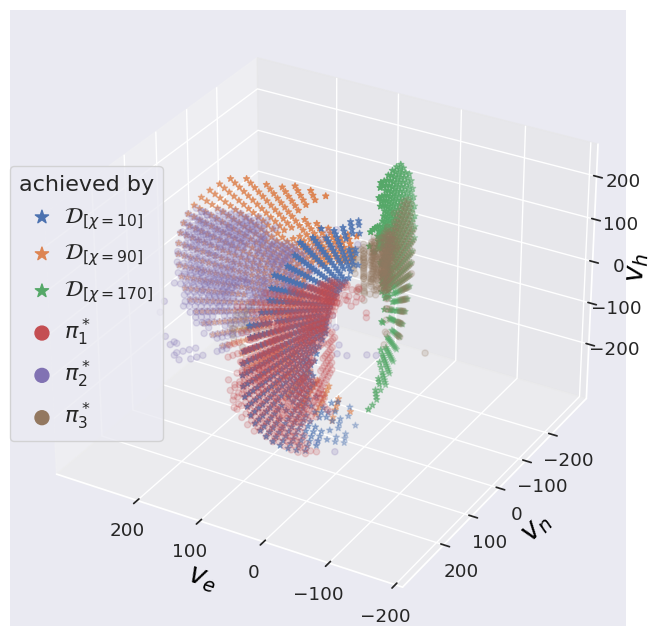

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
# ax = Axes3D(fig)

# ax3d = ax.scatter(
#     xs=demos_df["v"],
#     ys=demos_df["mu"],
#     zs=demos_df["chi"],
#     c="black",
# )

tmp_color_array = [
    sns.color_palette("deep")[3] if item == "$\mathcal{D}$" 
    else sns.color_palette("pastel")[9] 
    for item in achieved_by
]

ax3d = ax.scatter(
    xs=ve_list[:DEMOS_10_NUM], 
    ys=vn_list[:DEMOS_10_NUM], 
    zs=vh_list[:DEMOS_10_NUM], 
    # c=traj_len_list,
    c=sns.color_palette("deep")[0],
    marker="*",
    depthshade=True,
    cmap="jet", 
    vmin=0, vmax=400
)

ax3d = ax.scatter(
    xs=ve_list[DEMOS_10_NUM:DEMOS_10_NUM+DEMOS_90_NUM], 
    ys=vn_list[DEMOS_10_NUM:DEMOS_10_NUM+DEMOS_90_NUM], 
    zs=vh_list[DEMOS_10_NUM:DEMOS_10_NUM+DEMOS_90_NUM], 
    # c=traj_len_list,
    c=sns.color_palette("deep")[1],
    marker="*",
    depthshade=True,
    cmap="jet", 
    vmin=0, vmax=400
)

ax3d = ax.scatter(
    xs=ve_list[DEMOS_10_NUM+DEMOS_90_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM], 
    ys=vn_list[DEMOS_10_NUM+DEMOS_90_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM], 
    zs=vh_list[DEMOS_10_NUM+DEMOS_90_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM], 
    # c=traj_len_list,
    c=sns.color_palette("deep")[2],
    marker="*",
    depthshade=True,
    cmap="jet", 
    vmin=0, vmax=400
)


ax3d = ax.scatter(
    xs=ve_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM], 
    ys=vn_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM], 
    zs=vh_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM], 
    # c=traj_len_list,
    c=sns.color_palette("deep")[3] ,
    marker="o",
    depthshade=True,
    cmap="jet", 
    alpha=0.2,
    vmin=0, vmax=400
)

ax3d = ax.scatter(
    xs=ve_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM], 
    ys=vn_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM], 
    zs=vh_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM], 
    # c=traj_len_list,
    c=sns.color_palette("deep")[4] ,
    marker="o",
    depthshade=True,
    cmap="jet", 
    alpha=0.2,
    vmin=0, vmax=400
)

ax3d = ax.scatter(
    xs=ve_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM+BC_CHI_170_NUM], 
    ys=vn_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM+BC_CHI_170_NUM], 
    zs=vh_list[DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM:DEMOS_10_NUM+DEMOS_90_NUM+DEMOS_170_NUM+BC_CHI_10_NUM+BC_CHI_90_NUM+BC_CHI_170_NUM], 
    # c=traj_len_list,
    c=sns.color_palette("deep")[5],
    marker="o",
    depthshade=True,
    cmap="jet", 
    alpha=0.2,
    vmin=0, vmax=400
)

lgd = plt.legend(
    [
        "$\mathcal{D}_{[\chi=10]}$", 
        "$\mathcal{D}_{[\chi=90]}$", 
        "$\mathcal{D}_{[\chi=170]}$",
        "$\pi_1^*$",
        "$\pi_2^*$",
        "$\pi_3^*$"
    ], 
    title="achieved by", 
    # mode="expand",
    # ncol=3,
    loc=(0, 0.3),
    handletextpad=0.0,
    frameon=True, 
    fontsize=16,
    title_fontsize=16
)

for handle in lgd.legendHandles:
    handle.set_sizes([100, 100])
    handle.set_alpha(1.)

ax.set_xlabel("$v_e$", fontdict={'size': 20, 'color': 'black'})
ax.set_ylabel("$v_n$", fontdict={'size': 20, 'color': 'black'})
ax.set_zlabel("$v_h$", labelpad=-1, fontdict={'size': 20, 'color': 'black'})
ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xticks([-200, -100, 0, 100, 200])
ax.set_yticks([-200, -100, 0, 100, 200])
ax.set_zticks([-200, -100, 0, 100, 200])
# fig.colorbar(ax3d, pad=0.08)
fig.savefig("achievable_goals_rl_bc_chi_10_90_170.pdf", format="pdf", bbox_inches="tight")